In [16]:

import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid')
import os #reading the folder 
import glob as gb #reading the folder 
import sklearn
#import keras
import cv2 #for compression 
import matplotlib.pyplot as plt
#from tensorflow.keras.utils import to_categorical

In [13]:
!pip install --upgrade tensorflow-gpu==2.2.0 --user
!pip uninstall tensorflow-datasets
!pip install tensorflow-datasets==4.0.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device




  Running setup.py clean for promise
Failed to build promise


In [18]:
### reading images(train,test,predict)
predpath = 'C:/Users/HUAWEI/Downloads/deep_learning/Data/DEEP/seg_pred/'
testpath = 'C:/Users/HUAWEI/Downloads/deep_learning/Data/DEEP/seg_test/'
trainpath = 'C:/Users/HUAWEI/Downloads/deep_learning/Data/DEEP/seg_train/'
for folder in  os.listdir(trainpath + '/seg_train') : 
    files = gb.glob(pathname= str( trainpath +'/seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')
    print('\t')
for folder in  os.listdir(testpath +'/seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')
#prediction 
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For training data , found 2191 in folder buildings
	
For training data , found 2271 in folder forest
	
For training data , found 2404 in folder glacier
	
For training data , found 1983 in folder mountain
	
For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street
For Prediction data , found 7301


# checking the image size

In [19]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [20]:
#train size
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    8810
(111, 150, 3)       3
(113, 150, 3)       3
(135, 150, 3)       3
(142, 150, 3)       2
(143, 150, 3)       2
(123, 150, 3)       2
(108, 150, 3)       2
(134, 150, 3)       2
(144, 150, 3)       2
(136, 150, 3)       2
(146, 150, 3)       2
(149, 150, 3)       1
(110, 150, 3)       1
(100, 150, 3)       1
(133, 150, 3)       1
(105, 150, 3)       1
(120, 150, 3)       1
(103, 150, 3)       1
(119, 150, 3)       1
(115, 150, 3)       1
(124, 150, 3)       1
(141, 150, 3)       1
(97, 150, 3)        1
(102, 150, 3)       1
(76, 150, 3)        1
dtype: int64

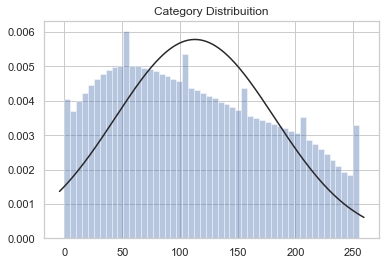

In [134]:
from scipy.stats import norm
plt.title('Category Distribuition')

ax = sns.distplot(x_train, fit=norm, kde=False)

In [21]:
#test images 
import matplotlib.pyplot as plt
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

In [22]:
#to find the prediction , and note ! there is no Y 
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()


(150, 150, 3)    7288
(108, 150, 3)       1
(133, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(124, 150, 3)       1
(143, 150, 3)       1
(374, 500, 3)       1
(126, 150, 3)       1
(139, 150, 3)       1
(129, 150, 3)       1
(112, 150, 3)       1
(100, 150, 3)       1
dtype: int64

# reading images:

In [21]:
!pip install --cache-dir=/data/vincents/ --build /data/vincents/ tensorflow-gpu


DEPRECATION: The -b/--build/--build-dir/--build-directory option is deprecated and has no effect anymore. pip 21.1 will remove support for this functionality. A possible replacement is use the TMPDIR/TEMP/TMP environment variable, possibly combined with --no-clean. You can find discussion regarding this at https://github.com/pypa/pip/issues/8333.
ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [23]:
#let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training
s=100

In [24]:
#to compress the images ,it includes copression for both the test ,predict and train
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
s=100
x_train=[]
y_train=[]
for folder in os.listdir(trainpath +'seg_train'):
    files=gb.glob(pathname=str(trainpath + 'seg_train//' +folder+'/*.jpg'))
    for file in files :
        image=cv.imread(file)
        image_array=cv.resize(image,(s,s))
        x_train.append(list(image_array))
        y_train.append((code[folder]))

In [25]:
#to represnt how many items in X_train
print(f'we have {len(x_train)} items in X_train')

we have 8849 items in X_train


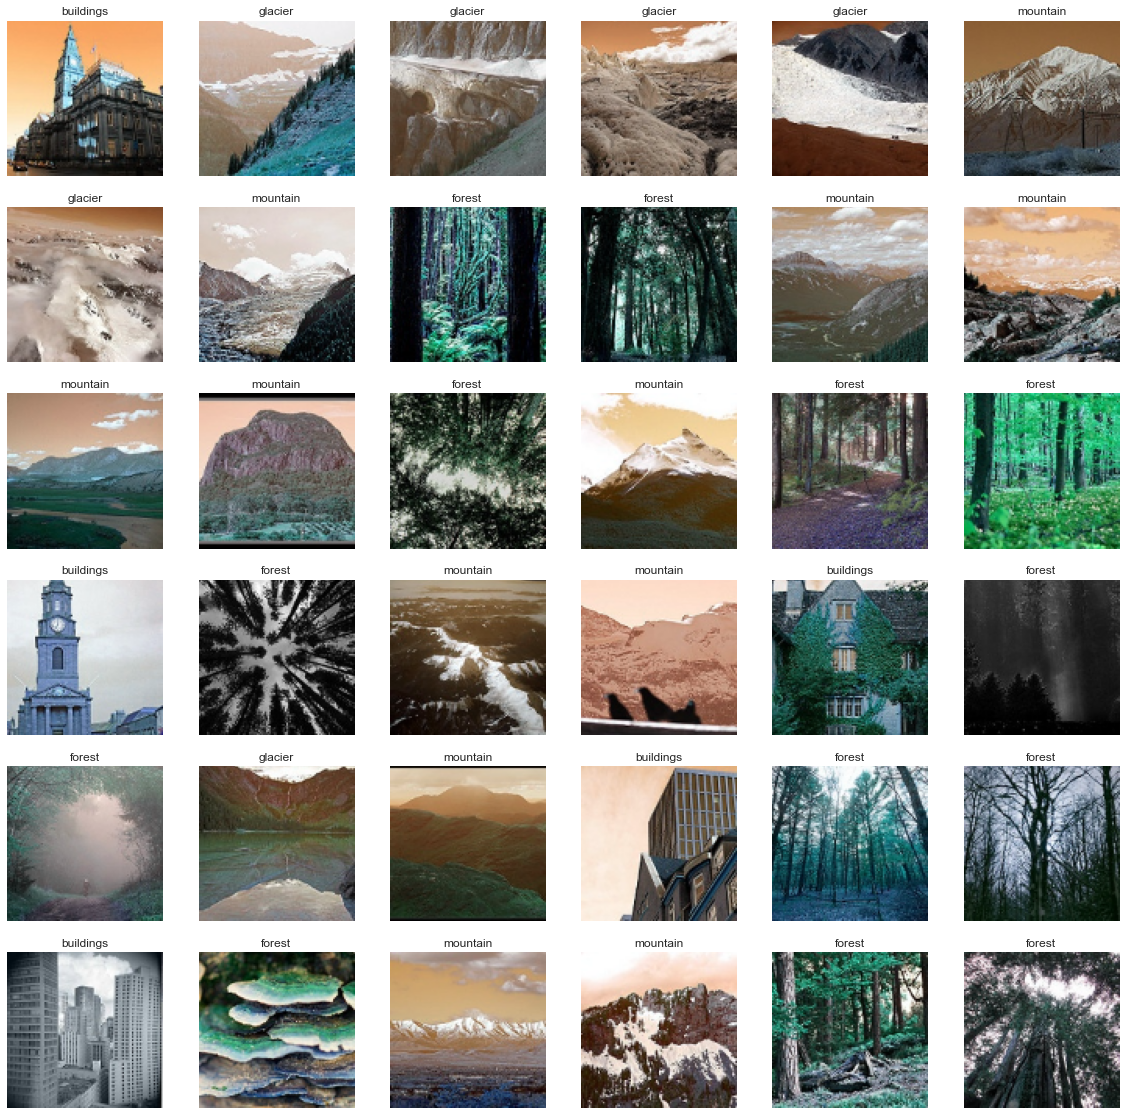

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [26]:
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
x_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])
        


In [27]:
print(f'we have {len(x_test)} items in x_test')

we have 3000 items in x_test


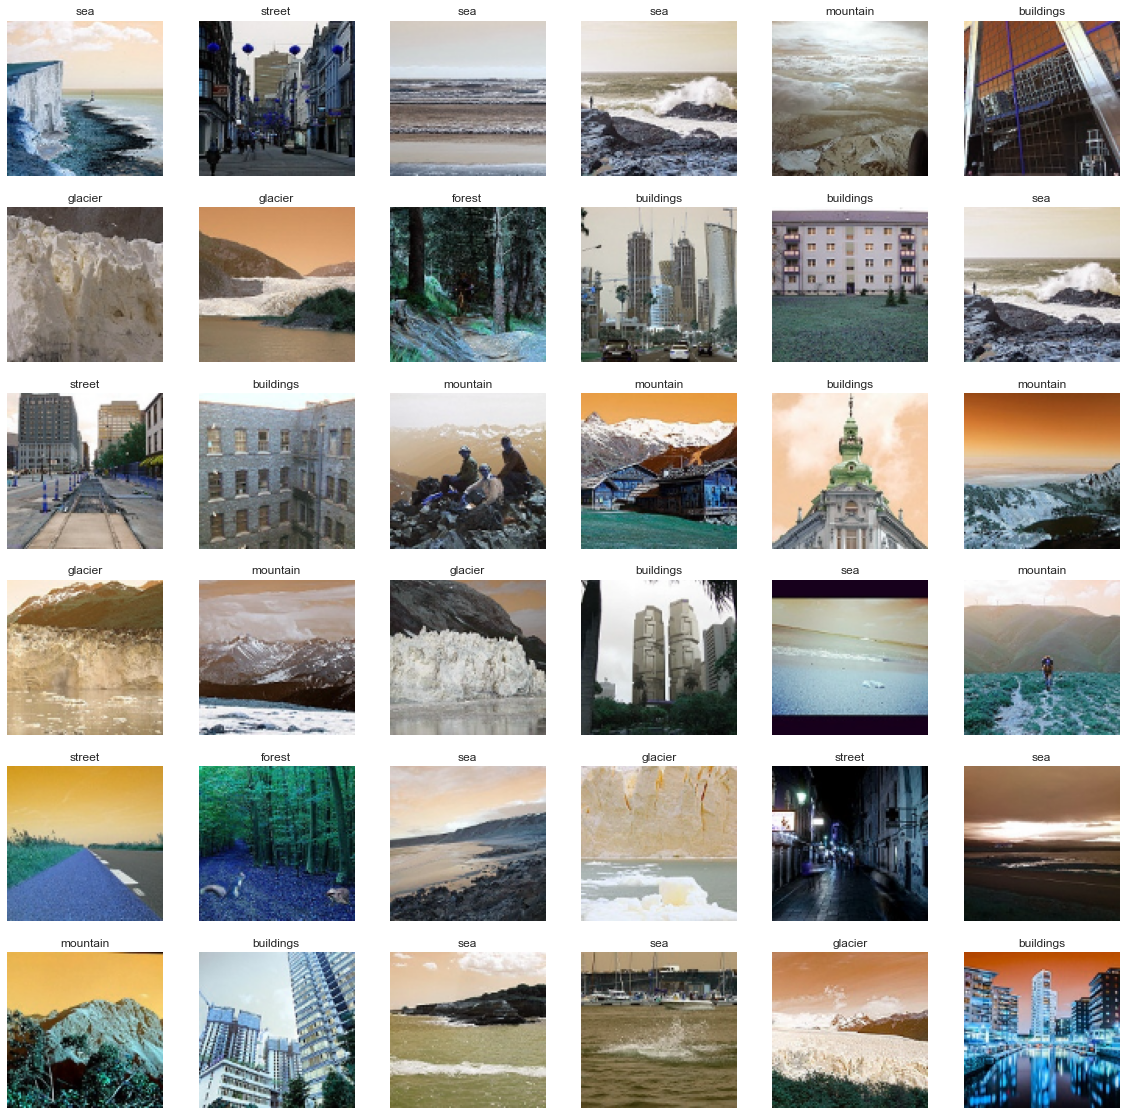

In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))
    
    

In [28]:
#also for predction ,but no need for the title 
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


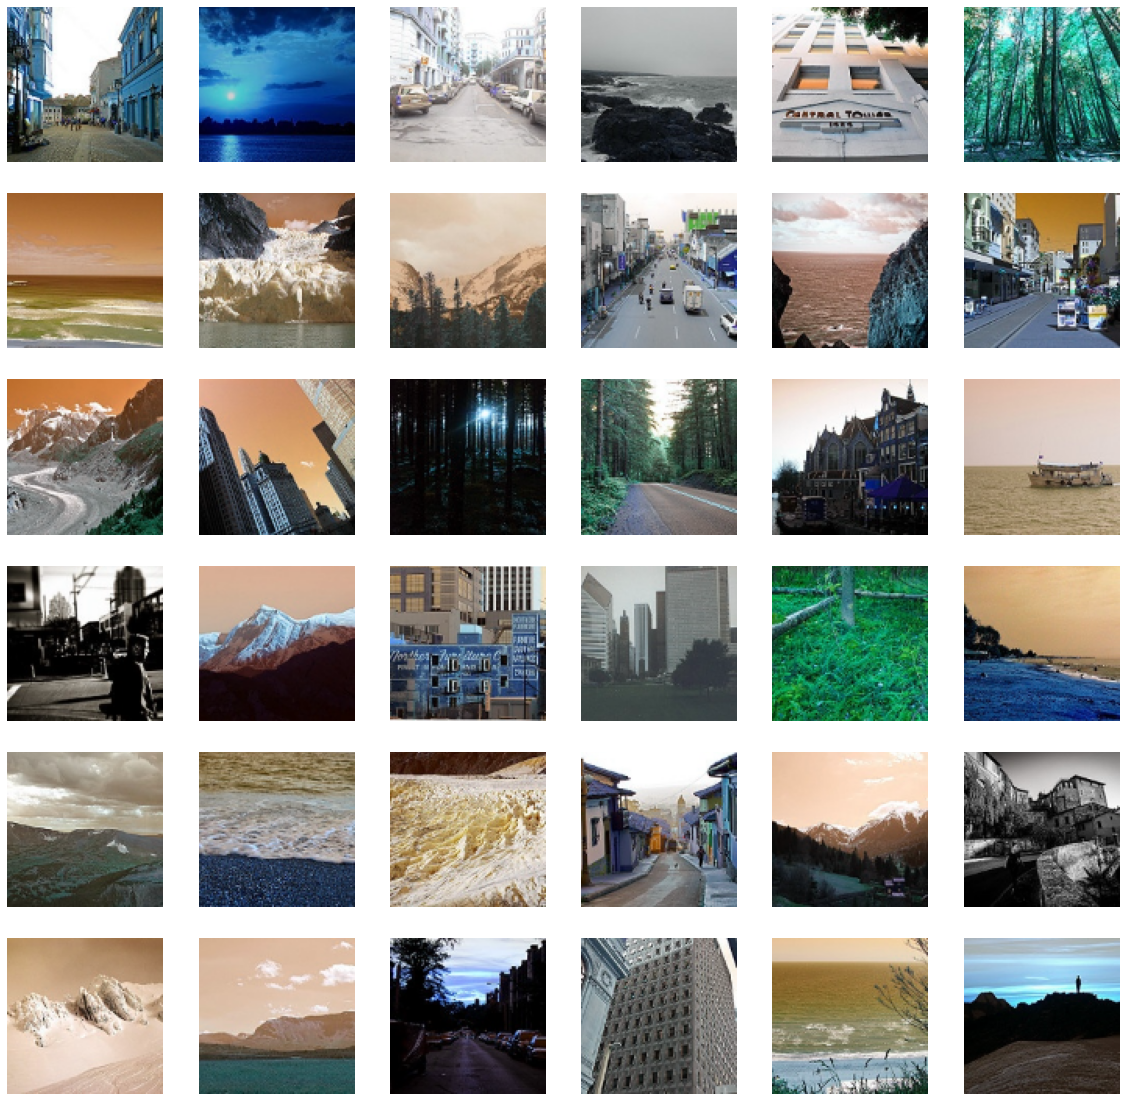

In [33]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

# Baseline Model

In [114]:
from sklearn.linear_model import LogisticRegression
#(number of images, channels* height* width)
150, 150, 3
x_train = X_train.reshape(50,3)
x_test = X_test.reshape(10,3)

lr_Baseline = LogisticRegression()
lr_Baseline.fit(x_train,y_train)



ValueError: cannot reshape array of size 265470000 into shape (50,3)

In [ ]:
print(accuracy_score(y_train,lr_Baseline.predict(x_train)))
print(accuracy_score(y_val,lr_Baseline.predict(x_testn)))

# modeling :

In [29]:
#first to convert the data into arrays using numpy
from sklearn.model_selection import train_test_split
import numpy as np 
X_train = np.array(x_train)

X_test = np.array(x_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (8849, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (8849,)
y_test shape  is (3000,)


In [ ]:
#building CNN model by Keras , I will dpend on using Conv2D layers , MaxPooling & Denses

In [35]:
from tensorflow.keras import utils as np_utils
!pip install keras 

In [41]:
# keras
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
#from keras.layers import Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import get_file

# Simple Convolutional Nural Network :

In [88]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(300,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(250,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        
     #adding 6 layers   
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

In [ ]:
#compiling the model , using adam optimizer , & sparse categorical crossentropy loss

In [89]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [90]:
#talking the glance 
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 98, 98, 300)       8400      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 96, 96, 250)       675250    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 250)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 22, 22, 120)       270120    
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (No

In [91]:
#now to train the model , lets use 50 epochs now

epochs =5
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)


Train on 8849 samples
Epoch 1/8
8849/8849 [==============================] - 3810s 431ms/sample - loss: 1.8116 - acc: 0.5265
Epoch 2/8
8849/8849 [==============================] - 3775s 427ms/sample - loss: 0.6992 - acc: 0.7421
Epoch 3/8
8849/8849 [==============================] - 3815s 431ms/sample - loss: 0.5946 - acc: 0.7812
Epoch 4/8
8849/8849 [==============================] - 3106s 351ms/sample - loss: 0.5350 - acc: 0.8116
Epoch 5/8
8849/8849 [==============================] - 3879s 438ms/sample - loss: 0.4733 - acc: 0.8408
Epoch 6/8
8849/8849 [==============================] - 3974s 449ms/sample - loss: 0.4148 - acc: 0.8589
Epoch 7/8
8849/8849 [==============================] - 4270s 483ms/sample - loss: 0.3814 - acc: 0.8723
Epoch 8/8
8849/8849 [==============================] - 4017s 454ms/sample - loss: 0.3839 - acc: 0.8685


In [95]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

Test Loss is 4.736499555746715
Test Accuracy is 0.5756666660308838


# Deep CNN

In [105]:
#now to predict X test

y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (3000, 6)


In [106]:
# redict X Predict

y_result = KerasModel.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))



Prediction Shape is (7301, 6)


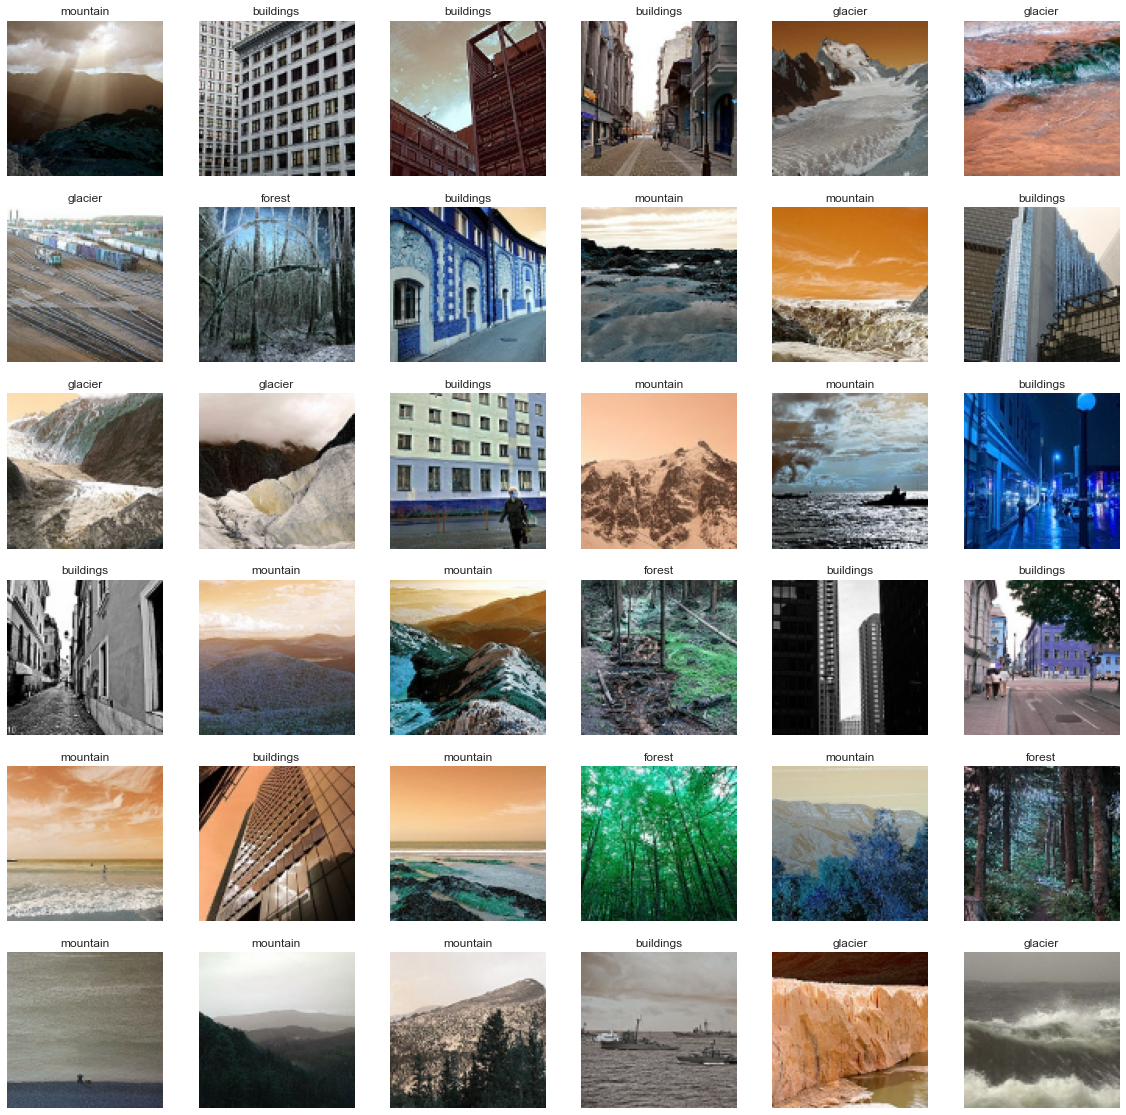

In [128]:
#and to show random redicted pictures & its predicting category

plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))